<a href="https://colab.research.google.com/github/sunil1206/Data-science/blob/main/IRIS_Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading dataset into python Environment

In [ ]:
df1 = pd.read_excel('/content/iris.xls')

In [ ]:
df1.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
df1.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

#Filling Missing Values

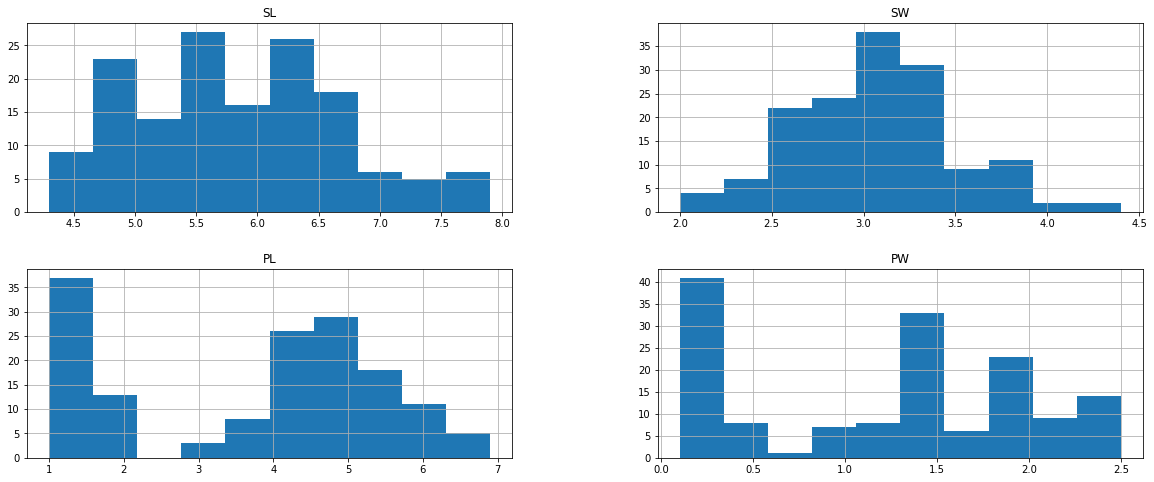

In [ ]:
freqgraph = df1.select_dtypes(include = 'float')
freqgraph.hist(figsize= (20, 8))
plt.show()

In [ ]:
df1.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
df1['SL'] =df1['SL'].fillna(df1['SL'].median())

In [ ]:
df1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
df1['SW'] =df1['SW'].fillna(df1['SW'].median())

In [ ]:
df1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
df1['PL']= df1['PL'].fillna(df1['PL'].median())

In [ ]:
df1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#Identifying and Removing Outliers

Text(0.5, 1.0, 'Boxplot of SL')

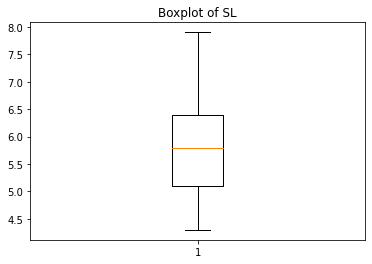

In [ ]:
plt.boxplot(df1['SL'])
plt.title("Boxplot of SL")

Text(0.5, 1.0, 'Boxplot of SW')

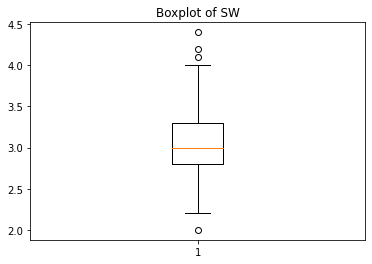

In [ ]:
plt.boxplot(df1['SW'])
plt.title('Boxplot of SW')

In [ ]:
Q1=np.percentile(df1['SW'],25,interpolation='midpoint')
Q2=np.percentile(df1['SW'],50,interpolation='midpoint')
Q3=np.percentile(df1['SW'],75,interpolation='midpoint')

In [ ]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [ ]:
IQR=Q3-Q1

In [ ]:
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR

In [ ]:
print(low_lim)
print(upp_lim)

2.05
4.05


In [ ]:
outlier = []
for x in df1['SW']:
  if ((x > upp_lim) or (x < low_lim)):
    outlier.append(x) 

In [ ]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [ ]:
ind1=df1['SW']>upp_lim
df1.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [ ]:
df1.drop([14, 15, 32, 33],inplace=True)

In [ ]:
ind2= df1['SW']<low_lim
df1.loc[ind2].index

Int64Index([60], dtype='int64')

In [ ]:
df1.drop([60],inplace=True)

Text(0.5, 1.0, 'Boxplot of SW')

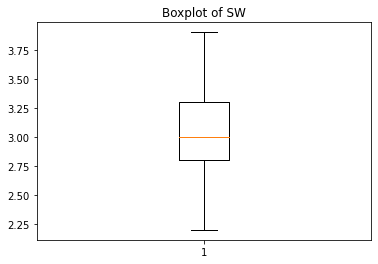

In [ ]:
plt.boxplot(df1["SW"])
plt.title('Boxplot of SW')

Text(0.5, 1.0, 'Boxplot of PL')

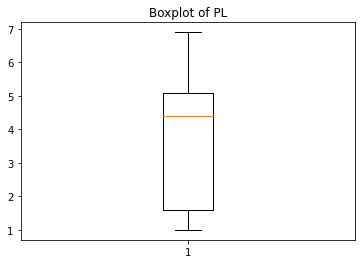

In [ ]:
plt.boxplot(df1["PL"])
plt.title('Boxplot of PL')

Text(0.5, 1.0, 'Boxplot of PW')

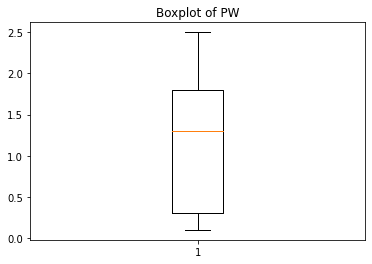

In [ ]:
plt.boxplot(df1["PW"])
plt.title('Boxplot of PW')

In [ ]:
df1.shape

(145, 5)

#Converting Categorical Data into Numerical Data using Label Enoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1['Classification'] = LE.fit_transform(df1['Classification'])

In [ ]:
print('Unique of Classification' , df1['Classification'].unique())

Unique of Classification [0 1 2]


In [ ]:
df1['Classification'] = df1['Classification'].replace(to_replace = 2, value = 1)

In [ ]:
df1

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


#Splitting the Dataset

In [ ]:
y=df1['Classification']
X=df1.drop('Classification',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
X_train.shape

(116, 4)

#Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [ ]:
from sklearn .metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Pricision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))
print("f1 is:",f1_score(y_test,y_pred))

Accuracy is: 1.0
Pricision is: 1.0
Recall is: 1.0
f1 is: 1.0


In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0],
       [ 0, 20]])

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    

In [ ]:
acc_values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'accuracy')

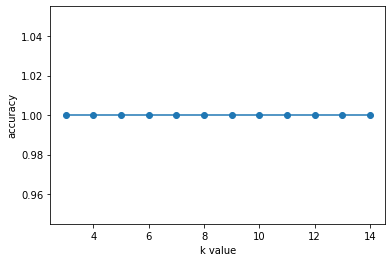

In [ ]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=1,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Pricision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))
print("f1 is:",f1_score(y_test,y_pred))

Accuracy is: 1.0
Pricision is: 1.0
Recall is: 1.0
f1 is: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
X = df1.drop('Classification',axis=1)
y = df1['Classification']

tree_model.fit(X,y)

tree_model.predict([[6.2,3.4,5.4,2.3]])

array([1])

#Decision Tree Classifier

In [ ]:

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_pred=tree_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0],
       [ 0, 20]])

#Linear SVM

In [ ]:

from sklearn.svm import SVC

In [ ]:
svm_linear = SVC(kernel = 'linear')

In [ ]:
svm_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred =svm_linear.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

1.0


#Polynomial SVM

In [ ]:

svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
Y_pred =svm_poly.predict(X_test)

In [ ]:
print(accuracy_score(y_test,Y_pred))

1.0


#Radial SVM

In [ ]:

svm_radial = SVC(kernel = 'poly', degree=3)
svm_radial.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred =svm_poly.predict(X_test)

In [ ]:
print('Accuracy is ',accuracy_score(y_test,Y_pred))

Accuracy is  1.0


#Random Forest CLassifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Pricision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))
print("f1 is:",f1_score(y_test,y_pred))

Accuracy is: 1.0
Pricision is: 1.0
Recall is: 1.0
f1 is: 1.0


In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0],
       [ 0, 20]])

#**All of the models provide the same accuracy i.e., 1.0**

# Unsupervised learning